In [1]:
# Módulos
import os
#from kaggle.api.kaggle_api_extended import KaggleApi
#import opendatasets as od
#import session_info
import association_metrics as am

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from word2number import w2n

import numpy as np
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from collections import Counter
import warnings
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

set_config(transform_output="pandas")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
#Tabla con informacion
df_train_ori=pd.read_csv('pt_train_data.csv',encoding="utf-8")

In [3]:
len(df_train_ori)

2620

In [4]:
df_train_ori

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez,Potable
0,1,5.097786,182.819015,23590.313710,9.128798,326.334863,445.562644,15.137781,68.608103,4.829323,0
1,2,6.260111,211.594112,18577.623970,7.154891,340.792574,357.098395,7.992210,82.365378,5.403615,1
2,3,8.815358,208.331084,26780.691790,7.223962,329.119685,430.406894,7.151751,88.413296,2.875880,0
3,4,6.579969,197.226981,17657.084180,4.506293,290.289894,254.393276,9.847655,73.749716,4.575932,0
4,5,NaN,169.547411,20004.733630,6.437675,NaN,349.865036,11.332518,41.703766,3.882004,0
...,...,...,...,...,...,...,...,...,...,...,...
2615,2616,4.313219,191.119337,12770.831830,8.231574,284.945949,499.854797,13.501271,76.443961,3.923590,0
2616,2617,8.247148,175.911830,9913.963346,4.974506,324.433308,302.200496,11.070511,71.438165,3.941969,0
2617,2618,NaN,170.099236,39906.190270,6.554996,NaN,515.386742,13.516078,40.514172,4.353239,0
2618,2619,9.320305,129.823859,16002.138320,4.405035,271.670562,499.844167,13.076859,82.837583,4.205810,0


In [5]:
#Tabla con informacion
df_test_ori=pd.read_csv('pt_test_data.csv',encoding="utf-8")

In [6]:
df_test_ori

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez
0,2621,10.761898,81.710895,25999.953670,8.477394,318.427241,392.704082,12.716350,52.246972,4.661799
1,2622,NaN,208.177464,17264.840920,3.296157,387.070824,631.304216,8.404570,68.300590,3.912148
2,2623,5.870616,186.178376,18909.846010,8.494235,328.747315,427.182531,13.300024,52.162419,3.728785
3,2624,8.757257,200.191400,21536.224690,4.915101,317.882901,404.717799,13.768323,47.930872,3.626135
4,2625,10.209956,148.379235,18413.096820,7.407967,390.619013,410.568172,15.103624,89.178485,4.112598
...,...,...,...,...,...,...,...,...,...,...
651,3272,7.035037,220.501888,19746.493250,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029
652,3273,6.139494,236.674026,8081.466471,6.250808,NaN,416.238821,12.777014,106.037222,3.260907
653,3274,6.703487,182.129514,24316.875150,7.009806,341.333952,479.537497,20.088643,53.925045,4.223884
654,3275,6.862936,220.147889,23580.657290,6.611543,285.192181,325.721747,13.472758,89.412935,3.806093


In [7]:
df_train_test = pd.concat([df_train_ori, df_test_ori], ignore_index=True)

In [8]:
df_train_test

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez,Potable
0,1,5.097786,182.819015,23590.313710,9.128798,326.334863,445.562644,15.137781,68.608103,4.829323,0.0
1,2,6.260111,211.594112,18577.623970,7.154891,340.792574,357.098395,7.992210,82.365378,5.403615,1.0
2,3,8.815358,208.331084,26780.691790,7.223962,329.119685,430.406894,7.151751,88.413296,2.875880,0.0
3,4,6.579969,197.226981,17657.084180,4.506293,290.289894,254.393276,9.847655,73.749716,4.575932,0.0
4,5,NaN,169.547411,20004.733630,6.437675,NaN,349.865036,11.332518,41.703766,3.882004,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3271,3272,7.035037,220.501888,19746.493250,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029,NaN
3272,3273,6.139494,236.674026,8081.466471,6.250808,NaN,416.238821,12.777014,106.037222,3.260907,NaN
3273,3274,6.703487,182.129514,24316.875150,7.009806,341.333952,479.537497,20.088643,53.925045,4.223884,NaN
3274,3275,6.862936,220.147889,23580.657290,6.611543,285.192181,325.721747,13.472758,89.412935,3.806093,NaN


In [9]:
#ELIMINAR COLUMNAS POR NULOS NO APLICA. 
# Establece el porcentaje de nulos permitido
umbral = 0.7
# Encuentra las columnas que exceden el umbral
cols_a_eliminar = df_train_test.columns[df_train_test.isnull().mean() > umbral]
cols_a_eliminar
# Elimina las columnas
#df_train_test.drop(cols_a_eliminar, axis=1, inplace=True)
#df_train_test.info()

Index([], dtype='object')

In [10]:
numerical_columns = ['ph','Dureza','Solidos','Cloraminas','Sulfato','Conductividad','Carbono_organico','Trihalometanos','Turbidez']
id= "Id"
tgt = "Potable"   

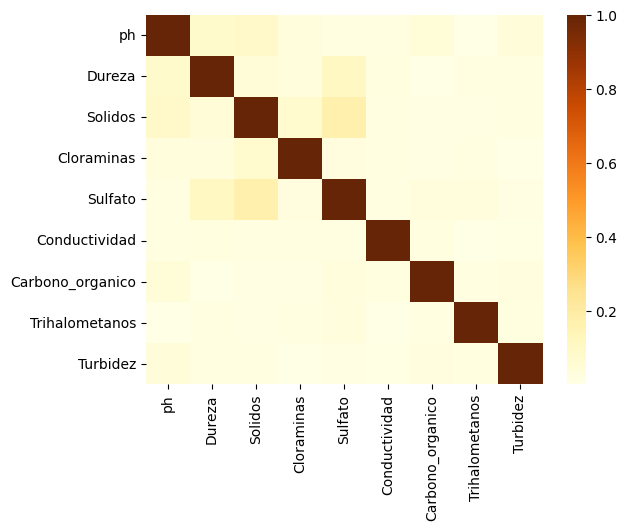

In [11]:
# Hacemos el mapa de calor para una mejor visualización de las correlaciones
sns.heatmap(np.abs(df_train_test[numerical_columns].corr()), annot=False, cmap= sns.color_palette("YlOrBr", as_cmap=True), annot_kws={"size": 10})
plt.show()

In [12]:
correlaciones=df_train_test[numerical_columns].corr()

In [13]:
variables_con_alta_corr = (correlaciones.stack()
                           .where(lambda x: abs(x) > 0.6)
                           .where(lambda x: x != 1)
                           .drop_duplicates())
print(variables_con_alta_corr)

ph  ph   NaN
dtype: float64


### DUPLICIDAD


In [14]:
#Revisamos duplicidad por el ID_REGISTRO
df_train_test[df_train_test.duplicated(subset=['Id'], keep=False)]

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez,Potable


In [15]:
#completitud
pd.DataFrame(df_train_test.isnull().sum(),columns = ['NA'])

,NA
Id,0
ph,491
Dureza,0
Solidos,0
Cloraminas,0
Sulfato,781
Conductividad,0
Carbono_organico,0
Trihalometanos,162
Turbidez,0


In [16]:
df_train_test.describe()

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez,Potable
count,3276.000000,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,2620.000000
mean,1638.500000,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390076
std,945.844067,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487860
min,1.000000,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,819.750000,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,1638.500000,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,2457.250000,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,3276.000000,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [17]:
7.080795
df_train_test['ph'].fillna(7.080795, inplace=True)

In [18]:
333.775777
df_train_test['Sulfato'].fillna(333.775777, inplace=True)

In [19]:
66.396293
df_train_test['Trihalometanos'].fillna(66.396293, inplace=True)

In [20]:
#completitud
pd.DataFrame(df_train_test.isnull().sum(),columns = ['NA'])

,NA
Id,0
ph,0
Dureza,0
Solidos,0
Cloraminas,0
Sulfato,0
Conductividad,0
Carbono_organico,0
Trihalometanos,0
Turbidez,0


In [21]:
len(df_train_ori)

2620

In [22]:
df_train = df_train_test[df_train_test['Id'] <= 2620]
df_test = df_train_test[df_train_test['Id'] > 2620]

In [23]:
for col in df_train.columns.drop('Potable'):
    print(f"variable " + col)
    # Ajusta el modelo de regresión logística
    formula = 'Potable ~ ' + col
    model = smf.logit(formula, data=df_train).fit()
    # Agrega el resumen del modelo a la lista
    print(model.summary().tables[1])
    print("\n")

variable Id
Optimization terminated successfully.
         Current function value: 0.668707
         Iterations 4
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4905      0.080     -6.106      0.000      -0.648      -0.333
Id          3.314e-05    5.3e-05      0.626      0.532   -7.07e-05       0.000


variable ph
Optimization terminated successfully.
         Current function value: 0.668717
         Iterations 4
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3333      0.198     -1.683      0.092      -0.722       0.055
ph            -0.0161      0.027     -0.586      0.558      -0.070       0.038


variable Dureza
Optimization terminated successfully.
         Current function value: 0.668763
         Iterations 4
                 c

In [24]:
#eliminamos las columnas 
df_train_test = df_train_test.drop(columns=['Trihalometanos', 'Turbidez'])

In [25]:
numerical_columns = ['ph','Dureza','Solidos','Cloraminas','Sulfato','Conductividad','Carbono_organico']

In [26]:
df_train = df_train_test[df_train_test['Id'] <= 2620]
df_test = df_train_test[df_train_test['Id'] > 2620]

In [27]:
df_train

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Potable
0,1,5.097786,182.819015,23590.313710,9.128798,326.334863,445.562644,15.137781,0.0
1,2,6.260111,211.594112,18577.623970,7.154891,340.792574,357.098395,7.992210,1.0
2,3,8.815358,208.331084,26780.691790,7.223962,329.119685,430.406894,7.151751,0.0
3,4,6.579969,197.226981,17657.084180,4.506293,290.289894,254.393276,9.847655,0.0
4,5,7.080795,169.547411,20004.733630,6.437675,333.775777,349.865036,11.332518,0.0
...,...,...,...,...,...,...,...,...,...
2615,2616,4.313219,191.119337,12770.831830,8.231574,284.945949,499.854797,13.501271,0.0
2616,2617,8.247148,175.911830,9913.963346,4.974506,324.433308,302.200496,11.070511,0.0
2617,2618,7.080795,170.099236,39906.190270,6.554996,333.775777,515.386742,13.516078,0.0
2618,2619,9.320305,129.823859,16002.138320,4.405035,271.670562,499.844167,13.076859,0.0


In [28]:
X= df_train.drop(['Potable','Id'],axis=1)
y = df_train['Potable']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=333,shuffle=True)
###############division de train y test

In [29]:
#Eficiencia del modelo sin hacer absolutamente nada
lr = LogisticRegression().fit(X_train, y_train)
print('Training Accuracy: ' + str(lr.score(X_train,y_train)))
print('Test Accuracy: ' + str(lr.score(X_test,y_test)))

Training Accuracy: 0.6049618320610687
Test Accuracy: 0.6297709923664122


In [30]:
# Crea el ColumnTransformer con la función personalizada
preprocesado = ColumnTransformer(
    [('scale', StandardScaler(), numerical_columns),
     #('one', OneHotEncoder(sparse=False,drop='first'),var_cat)
    ],
    remainder='drop'
)

pipeline = Pipeline([
    ('prepross', preprocesado),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),#,interaction_only=True
])

X_train_pp = pipeline.fit_transform(X_train,y_train)
X_test_pp = pipeline.transform(X_test)
#----------------
df_test = pipeline.transform(df_test)

# Modelación
lr2 = LogisticRegression().fit(X_train_pp, y_train)
print('Training Accuracy: ' + str(lr2.score(X_train_pp,y_train)))
print('Test Accuracy: ' + str(lr2.score(X_test_pp,y_test)))

Training Accuracy: 0.6817748091603053
Test Accuracy: 0.6965648854961832


In [31]:
# K-BEST
kbest = SelectKBest(score_func=f_regression, k=5)  
X_train_kbest = kbest.fit_transform(X_train_pp, y_train)
kbest = pd.DataFrame({'Feature': X_train_pp.columns, 'Score': kbest.scores_}).sort_values(by='Score', ascending=False)
kbest

,Feature,Score
11,scale__ph scale__Sulfato,83.861919
10,scale__ph scale__Cloraminas,58.137389
22,scale__Solidos scale__Sulfato,50.803520
29,scale__Sulfato^2,34.667601
9,scale__ph scale__Solidos,25.994185
8,scale__ph scale__Dureza,20.886050
7,scale__ph^2,18.667761
14,scale__Dureza^2,9.340040
25,scale__Cloraminas^2,4.826719
30,scale__Sulfato scale__Conductividad,4.252306


In [32]:
get_cols = kbest[kbest['Score']>20].Feature.tolist()
X_train_pp = X_train_pp[get_cols]
X_test_pp = X_test_pp[get_cols]
#--------------------------------
df_test = df_test[get_cols]

In [33]:
# Modelación
lr2 = LogisticRegression().fit(X_train_pp, y_train)
print('Training Accuracy: ' + str(lr2.score(X_train_pp,y_train)))
print('Test Accuracy: ' + str(lr2.score(X_test_pp,y_test)))

Training Accuracy: 0.6727099236641222
Test Accuracy: 0.6908396946564885


In [34]:
cv_scores = cross_val_score(estimator = lr2,
                X= X_test_pp, y= y_test,
                scoring ='r2',
                cv=RepeatedKFold(n_splits=10, n_repeats=5, random_state=333),
                n_jobs    = -1
            )

print(f"Train R2 en CV: mean {np.mean(cv_scores)}, std: {np.std(cv_scores)}")

Train R2 en CV: mean -0.3662184364417142, std: 0.23235865071895168


In [35]:
pd.to_pickle(lr2,'./Modelo2Examen1.pkl')

In [36]:
pd.read_pickle('./Modelo2Examen1.pkl')

LogisticRegression()

In [37]:
df_test

,scale__ph scale__Sulfato,scale__ph scale__Cloraminas,scale__Solidos scale__Sulfato,scale__Sulfato^2,scale__ph scale__Solidos,scale__ph scale__Dureza
2620,-1.082510,2.193687,-0.197266,0.184029,1.160372,-8.781744
2621,0.006910,-0.011575,-0.782580,2.125170,-0.002545,0.001657
2622,0.119641,-0.724570,0.050736,0.021118,0.287435,0.260613
2623,-0.511342,-1.620790,0.021960,0.197090,-0.056973,0.124164
2624,3.337365,0.398917,-0.631165,2.419033,-0.870773,-3.135415
...,...,...,...,...,...,...
3271,-0.027662,0.000979,-0.264109,1.083989,0.006740,-0.019205
3272,0.004543,0.353913,0.011260,0.000050,1.013081,-0.775226
3273,-0.050847,0.017369,0.053733,0.040258,-0.067867,0.111293
3274,0.193754,0.046624,-0.246756,1.802323,-0.026527,-0.102777


In [38]:
predicciones = lr2.predict(df_test)

In [39]:
df_test

,scale__ph scale__Sulfato,scale__ph scale__Cloraminas,scale__Solidos scale__Sulfato,scale__Sulfato^2,scale__ph scale__Solidos,scale__ph scale__Dureza
2620,-1.082510,2.193687,-0.197266,0.184029,1.160372,-8.781744
2621,0.006910,-0.011575,-0.782580,2.125170,-0.002545,0.001657
2622,0.119641,-0.724570,0.050736,0.021118,0.287435,0.260613
2623,-0.511342,-1.620790,0.021960,0.197090,-0.056973,0.124164
2624,3.337365,0.398917,-0.631165,2.419033,-0.870773,-3.135415
...,...,...,...,...,...,...
3271,-0.027662,0.000979,-0.264109,1.083989,0.006740,-0.019205
3272,0.004543,0.353913,0.011260,0.000050,1.013081,-0.775226
3273,-0.050847,0.017369,0.053733,0.040258,-0.067867,0.111293
3274,0.193754,0.046624,-0.246756,1.802323,-0.026527,-0.102777


In [40]:
df_test_ori

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez
0,2621,10.761898,81.710895,25999.953670,8.477394,318.427241,392.704082,12.716350,52.246972,4.661799
1,2622,NaN,208.177464,17264.840920,3.296157,387.070824,631.304216,8.404570,68.300590,3.912148
2,2623,5.870616,186.178376,18909.846010,8.494235,328.747315,427.182531,13.300024,52.162419,3.728785
3,2624,8.757257,200.191400,21536.224690,4.915101,317.882901,404.717799,13.768323,47.930872,3.626135
4,2625,10.209956,148.379235,18413.096820,7.407967,390.619013,410.568172,15.103624,89.178485,4.112598
...,...,...,...,...,...,...,...,...,...,...
651,3272,7.035037,220.501888,19746.493250,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029
652,3273,6.139494,236.674026,8081.466471,6.250808,NaN,416.238821,12.777014,106.037222,3.260907
653,3274,6.703487,182.129514,24316.875150,7.009806,341.333952,479.537497,20.088643,53.925045,4.223884
654,3275,6.862936,220.147889,23580.657290,6.611543,285.192181,325.721747,13.472758,89.412935,3.806093


In [41]:
len(predicciones)

656

In [61]:
df_predicciones = pd.DataFrame(predicciones, columns=['PotablePrediction'])

In [62]:
df_predicciones['PotablePrediction'] = pd.DataFrame(predicciones)

In [63]:
df_predicciones = df_predicciones['PotablePrediction']

In [64]:
df_predicciones

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
651    0.0
652    1.0
653    0.0
654    0.0
655    1.0
Name: PotablePrediction, Length: 656, dtype: float64

In [65]:
df_predicciones_final=pd.merge( df_test_ori,df_predicciones, left_index=True, right_index=True)
df_predicciones_final

,Id,ph,Dureza,Solidos,Cloraminas,Sulfato,Conductividad,Carbono_organico,Trihalometanos,Turbidez,PotablePrediction
0,2621,10.761898,81.710895,25999.953670,8.477394,318.427241,392.704082,12.716350,52.246972,4.661799,1.0
1,2622,NaN,208.177464,17264.840920,3.296157,387.070824,631.304216,8.404570,68.300590,3.912148,0.0
2,2623,5.870616,186.178376,18909.846010,8.494235,328.747315,427.182531,13.300024,52.162419,3.728785,0.0
3,2624,8.757257,200.191400,21536.224690,4.915101,317.882901,404.717799,13.768323,47.930872,3.626135,0.0
4,2625,10.209956,148.379235,18413.096820,7.407967,390.619013,410.568172,15.103624,89.178485,4.112598,0.0
...,...,...,...,...,...,...,...,...,...,...,...
651,3272,7.035037,220.501888,19746.493250,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029,0.0
652,3273,6.139494,236.674026,8081.466471,6.250808,NaN,416.238821,12.777014,106.037222,3.260907,1.0
653,3274,6.703487,182.129514,24316.875150,7.009806,341.333952,479.537497,20.088643,53.925045,4.223884,0.0
654,3275,6.862936,220.147889,23580.657290,6.611543,285.192181,325.721747,13.472758,89.412935,3.806093,0.0


In [66]:
df_predicciones_final = df_predicciones_final[['Id','PotablePrediction']]

In [67]:
df_test

,scale__ph scale__Sulfato,scale__ph scale__Cloraminas,scale__Solidos scale__Sulfato,scale__Sulfato^2,scale__ph scale__Solidos,scale__ph scale__Dureza
2620,-1.082510,2.193687,-0.197266,0.184029,1.160372,-8.781744
2621,0.006910,-0.011575,-0.782580,2.125170,-0.002545,0.001657
2622,0.119641,-0.724570,0.050736,0.021118,0.287435,0.260613
2623,-0.511342,-1.620790,0.021960,0.197090,-0.056973,0.124164
2624,3.337365,0.398917,-0.631165,2.419033,-0.870773,-3.135415
...,...,...,...,...,...,...
3271,-0.027662,0.000979,-0.264109,1.083989,0.006740,-0.019205
3272,0.004543,0.353913,0.011260,0.000050,1.013081,-0.775226
3273,-0.050847,0.017369,0.053733,0.040258,-0.067867,0.111293
3274,0.193754,0.046624,-0.246756,1.802323,-0.026527,-0.102777


In [68]:
df_predicciones_final.to_csv('pt_res_NKSR1.csv',index=False)

In [69]:
df_predicciones_final.groupby(['PotablePrediction']).size()

PotablePrediction
0.0    540
1.0    116
dtype: int64